# Sequoia Falco - Spanwise airloads
The spanwise airloads distribution will be calculated with the Schrenk method. This method relies on the fact that the distribution of lift across the span of an unswept wing does not differ much from elliptic airloads distribution. The process is the following: 
1. Define $y$ and $\eta$, dimensional and non-dimensional spanwise stations distribution.
2. Calculate elliptical load distribution as follow 
\begin{equation}
(c\cdot C_{l})_{\text{elliptical}} = \frac{4S}{\pi b} \cdot \sqrt{1 - \eta^2}
\end{equation}
with $S = \text{Wing area}$, $b = \text{Wing span}$.
3. Calculate the Schrenk's airloads distribution with the following formula 
\begin{equation}
(c \cdot C_{l})_{\text{Schrenk}} = \frac{c(y) + (c \cdot C_{l})_{\text{elliptical}}}{2}
\end{equation}
To obtai the local lift coefficient distribution $C_{l} = C_{l}(y)$ at a wing global lift coefficient equal to $C_{L} = 1.0$ simply divide $(c \cdot C_{l})_{\text{Schrenk}}$ by the chord distribution. 

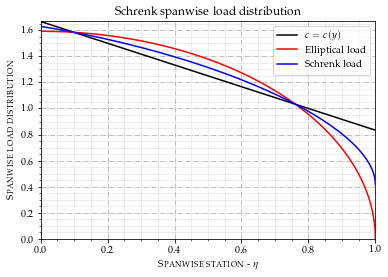

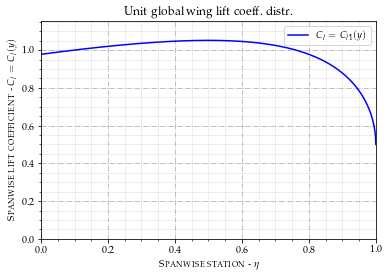

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 14 09:47:06 2021

@author: claum
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.backends.backend_pdf import PdfPages
import Schrenk_Load
import json 
from types import SimpleNamespace
# ===================================================================
# CLOSE ALL FIGURE
# ===================================================================
plt.close('all')
# ===================================================================
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# ===================================================================
stat1  = PdfPages('figura1.pdf')
stat2  = PdfPages('figura2.pdf')
# stat3  = PdfPages('figura3.pdf')
# ===================================================================
# from collections import defaultdict
# from pprint import pprint
# =======================================
JSONFileName1 = "schrenkdata.json"
with open(JSONFileName1, "r") as f:
    # ===================================
    # CREATING A DATABASE
    # ===================================
    schrenk_data = json.load(f)
# ===================================================
#   DEFINING AN OBJECT WITH ALL THE DATA
# ===================================================    
Schrenk_Data     = SimpleNamespace(**schrenk_data)
# =======================================
#   PRINTING ALL THE DATA
# =======================================
# ===================================================================
S       = Schrenk_Data.S["Value"] 
b       = Schrenk_Data.b["Value"]  
c_tip   = Schrenk_Data.ctip["Value"] 
c_root  = Schrenk_Data.croot["Value"]  
n       = 1000
my_load = Schrenk_Load.Schrenk_Load(b, S, c_root, c_tip, n) 
# ===================================================================
fig1  = plt.figure()
plt.plot(my_load[1], my_load[2], color="black", label='$c = c(y)$')
plt.plot(my_load[1], my_load[3], color="red", label='Elliptical load')
plt.plot(my_load[1], my_load[4], color="blue", label='Schrenk load')
plt.xlim((0.0, 1.0))
maxim1 = np.nanmax(my_load[2])
maxim2 = np.nanmax(my_load[4])
maxim3 = np.nanmax(my_load[4])
if maxim1 > maxim2 and maxim1 > maxim3: 
    plt.ylim((0.0, maxim1))
elif maxim2 > maxim1 and maxim2 > maxim3: 
    plt.ylim((0.0, maxim2))
elif maxim3 > maxim1 and maxim3 > maxim2: 
    plt.ylim((0.0, maxim3))    
plt.ylabel(r'\textsc{Spanwise load distribution}')              # y-label to the axes.
plt.xlabel(r'\textsc{Spanwise station} - $\eta$')      # x-label to the axes.
plt.title(r'Schrenk spanwise load distribution') 
plt.legend()
plt.grid(True, linestyle='-.', which='both')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()
stat1.savefig(fig1)
stat1.close()
# ===================================================================
# ===================================================================
fig2  = plt.figure()
# plt.plot(my_load[1], my_load[2], color="black", label='$c = c(y)$')
# plt.plot(my_load[1], my_load[3], color="red", label='Elliptical load')
plt.plot(my_load[1], my_load[5], color="blue", label='$C_l = C_{l1}(y)$')
plt.xlim((0.0, 1.0))
plt.ylim((0.0, np.nanmax(my_load[5]) + 0.1))    
plt.ylabel(r'\textsc{Spanwise lift coefficient} - $C_l = C_{l}(y)$')              # y-label to the axes.
plt.xlabel(r'\textsc{Spanwise station} - $\eta$')      # x-label to the axes.
plt.title(r'Unit global wing lift coeff. distr.') 
plt.legend()
plt.grid(True, linestyle='-.', which='both')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()
stat2.savefig(fig2)
stat2.close()
# ===================================================================


In [2]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code